# Exploratory Data Analysis (EDA)

Questo notebook presenta un’analisi esplorativa dei dati relativa a un dataset contenente misurazioni agronomiche su diverse cultivar di soia.

L’obiettivo dell’analisi è comprendere la struttura del dataset, la distribuzione delle variabili e le relazioni tra le caratteristiche morfologiche e la resa in grano della soia (Grain Yield).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [ ]:
!rm data*.csv


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [ ]:
!ls

data.csv  sample_data


In [ ]:
df = pd.read_csv("data.csv")
df.columns = df.columns.str.strip()
df.columns


Index(['Season', 'Cultivar', 'Repetition', 'PH', 'IFP', 'NLP', 'NGP', 'NGL',
       'NS', 'MHG', 'GY'],
      dtype='object')

In [ ]:
df = pd.read_csv("data.csv")
df.head()


,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,NEO 760 CE,1,58.80,15.20,98.2,177.80,1.81,5.2,152.20,3232.82
1,1,NEO 760 CE,2,58.60,13.40,102.0,195.00,1.85,7.2,141.69,3517.36
2,1,NEO 760 CE,3,63.40,17.20,100.4,203.00,2.02,6.8,148.81,3391.46
3,1,NEO 760 CE,4,60.27,15.27,100.2,191.93,1.89,6.4,148.50,3312.58
4,1,MANU IPRO,1,81.20,18.00,98.8,173.00,1.75,7.4,145.59,3230.99


### Ispezione iniziale dei dati

Il dataset è stato caricato correttamente e sono state visualizzate le prime osservazioni per verificarne la struttura.
Si osserva la presenza di variabili categoriche (Season, Cultivar) e variabili numeriche di tipo agronomico.
La variabile target per l’analisi predittiva sembra essere GY (Grain Yield).




In [ ]:
df.shape


(320, 11)

### Dimensioni del dataset

È stata verificata la dimensione del dataset per comprendere il numero di osservazioni e di variabili disponibili.
Questa informazione è utile per valutare l’adeguatezza del dataset rispetto all'uso nel modello di machine learning.


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      320 non-null    int64  
 1   Cultivar    320 non-null    object 
 2   Repetition  320 non-null    int64  
 3   PH          320 non-null    float64
 4   IFP         320 non-null    float64
 5   NLP         320 non-null    float64
 6   NGP         320 non-null    float64
 7   NGL         320 non-null    float64
 8   NS          320 non-null    float64
 9   MHG         320 non-null    float64
 10  GY          320 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 27.6+ KB


### Analisi dei tipi di dato

È stata effettuata un’analisi dei tipi di dato per distinguere le variabili numeriche da quelle categoriche.
"Season" e "Cultivar" rappresentano variabili categoriche, mentre le altre colonne contengono misurazioni numeriche di tipo agronomico.
Comprendere i tipi di dato è fondamentale per pianificare eventuali operazioni di preprocessing.


In [ ]:
df.describe()


,Season,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
count,320.000000,320.000000,320.000000,320.0000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,1.500000,2.500000,68.386781,15.4650,59.088313,135.085844,2.290844,4.071656,168.322313,3418.553794
std,0.500783,1.119785,8.958194,3.0243,20.068187,60.494529,0.840116,1.474531,19.625566,503.003602
min,1.000000,1.000000,47.600000,7.2000,20.200000,47.800000,0.940000,0.400000,127.060000,1538.230000
25%,1.000000,1.750000,62.950000,13.6000,44.350000,95.052500,2.000000,3.000000,153.845000,3126.611552
50%,1.500000,2.500000,67.200000,15.6000,54.500000,123.000000,2.280000,3.800000,166.150000,3397.276724
75%,2.000000,3.250000,74.347500,17.3300,71.220000,161.350000,2.480000,5.000000,183.182500,3708.262931
max,2.000000,4.000000,94.800000,26.4000,123.000000,683.400000,14.860000,9.000000,216.000000,4930.000000


In [ ]:
df.isnull().sum()


,0
Season,0
Cultivar,0
Repetition,0
PH,0
IFP,0
NLP,0
NGP,0
NGL,0
NS,0
MHG,0


### Verifica dei valori mancanti

È stata controllata la presenza di valori mancanti nel dataset.
Non sono stati rilevati valori nulli, pertanto non è necessario applicare tecniche di pulizia dei dati in questa fase.


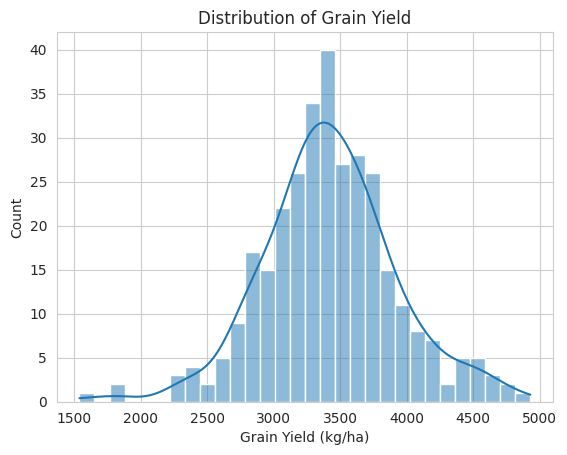

In [ ]:
plt.figure()
sns.histplot(df["GY"], bins=30, kde=True)
plt.xlabel("Grain Yield (kg/ha)")
plt.title("Distribution of Grain Yield")
plt.show()


### Distribuzione della variabile target

È stata analizzata la distribuzione della variabile GY (Grain Yield), che rappresenta l’obiettivo della modellazione.
Osservare la distribuzione consente di valutare la variabilità, eventuali asimmetrie e la natura dei dati in vista di un modello di regressione.


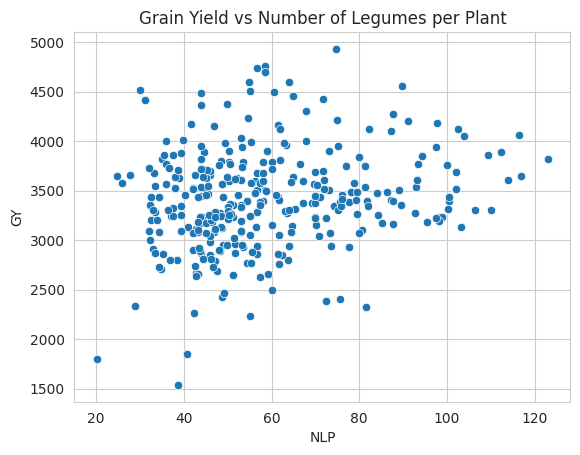

In [ ]:
plt.figure()
sns.scatterplot(x="NLP", y="GY", data=df)
plt.title("Grain Yield vs Number of Legumes per Plant")
plt.show()


Questo scatter plot mostra una relazione positiva ma non uniforme tra
il numero di legumi per pianta e la resa del grano.

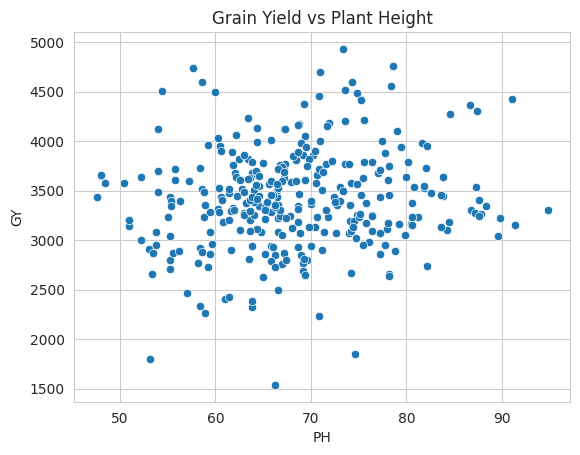

In [ ]:
plt.figure()
sns.scatterplot(x="PH", y="GY", data=df)
plt.title("Grain Yield vs Plant Height")
plt.show()

### Relazione tra Altezza della Pianta (PH) e Resa (GY)

È stato analizzato il rapporto tra l’altezza della pianta (Plant Height - PH) e la resa in grano (Grain Yield - GY) mediante uno scatter plot.
Questo grafico consente di osservare se esiste una relazione tra lo sviluppo vegetativo della pianta e la produzione finale.
L’identificazione di un eventuale trend può indicare se l’altezza della pianta rappresenti una variabile rilevante ai fini predittivi.


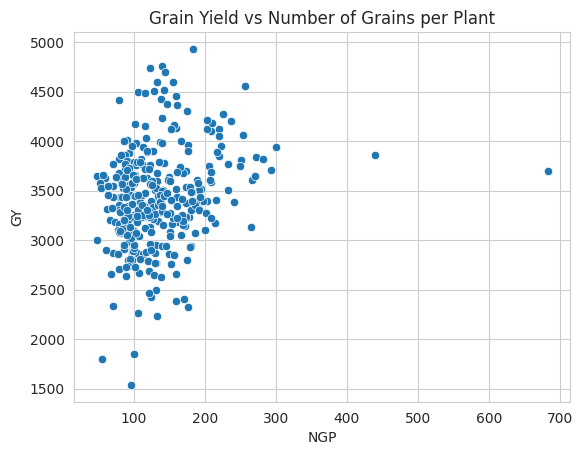

In [ ]:
plt.figure()
sns.scatterplot(x="NGP", y="GY", data=df)
plt.title("Grain Yield vs Number of Grains per Plant")
plt.show()


### Relazione tra Numero di Semi per Pianta (NGP) e Resa (GY)

È stata esplorata la relazione tra il numero di semi per pianta (Number of Grains per Plant - NGP) e la resa (GY).
Dal punto di vista agronomico, questa variabile potrebbe avere un impatto diretto sulla produzione complessiva.
Lo scatter plot permette di valutare la presenza di una correlazione e la natura della relazione tra le due variabili.


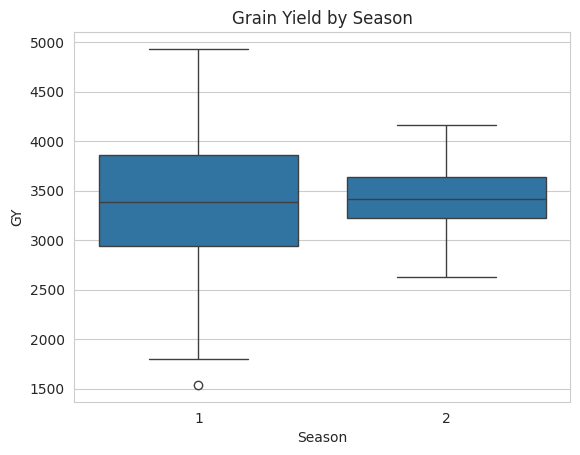

In [ ]:
plt.figure()
sns.boxplot(x="Season", y="GY", data=df)
plt.title("Grain Yield by Season")
plt.show()


### Distribuzione della Resa per Stagione

È stato realizzato un boxplot per analizzare la distribuzione della resa (GY) nelle diverse stagioni.
Questo tipo di visualizzazione permette di confrontare mediana, variabilità e possibili outlier tra i gruppi.
L’analisi consente di valutare se la variabile Season possa influenzare significativamente la produzione.


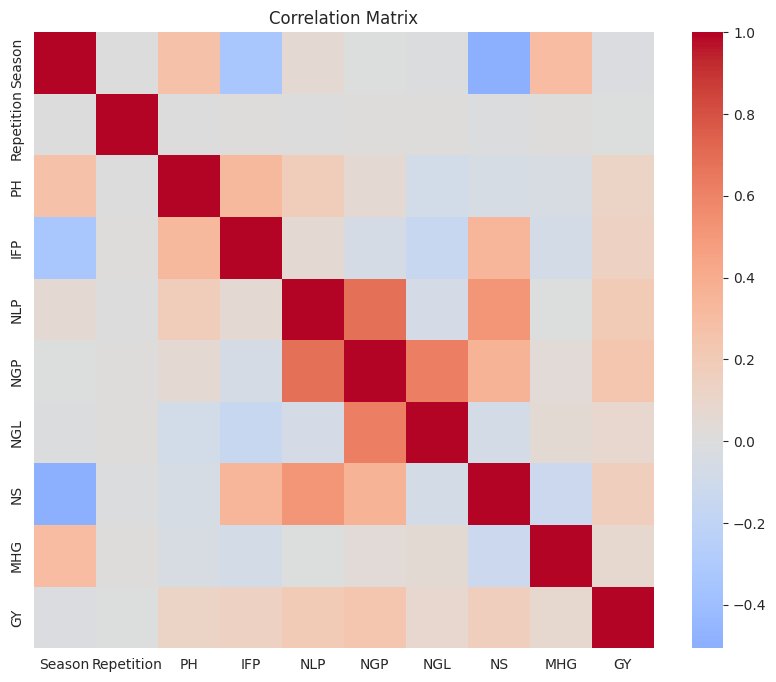

In [ ]:
corr = df.select_dtypes(include="number").corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()


### Matrice di Correlazione

È stata calcolata e visualizzata la matrice di correlazione tra tutte le variabili numeriche del dataset.
La heatmap consente di individuare rapidamente relazioni lineari positive o negative tra le feature.
Colorazioni più intense indicano correlazioni più forti, mentre valori prossimi allo zero suggeriscono assenza di relazione lineare.
Questa analisi è utile sia per identificare variabili potenzialmente predittive sia per rilevare eventuali problemi di multicollinearità.


## Conclusioni dell’Analisi Esplorativa (EDA)

Il dataset analizzato è composto da 320 osservazioni e diverse variabili numeriche di natura agronomica.
I nomi delle colonne sono stati uniformati per garantire coerenza e prevenire errori durante l’analisi.

Non sono stati rilevati valori mancanti, pertanto non è stato necessario effettuare operazioni di pulizia o imputazione dei dati.

La variabile target, Grain Yield (GY), presenta una variabilità moderata tra le osservazioni.
Dall’analisi grafica e dalla matrice di correlazione emerge che alcune caratteristiche morfologiche, come l’altezza della pianta (PH) e il numero di semi per pianta (NGP), mostrano una relazione con la resa.

Inoltre, l’analisi per stagione suggerisce possibili differenze nella distribuzione della produzione, indicando che la variabile Season potrebbe influenzare il rendimento.

Nel complesso, il dataset risulta ben strutturato e adeguato per le successive fasi di modellazione predittiva.
